# Проведем когортный анализ пользователей, используя Pandas. Данные US E-commerce records 2020.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

Выгрузим данные.

In [2]:
df = pd.read_csv('/home/oleg/Downloads/US E-commerce records 2020.csv')
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,NaN,NaN,NaN,NaN,NaN
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.43,11,0.0,199.2606,NaN,NaN,NaN,NaN,NaN
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Wilson Jones Easy Flow II Sheet Lifters,3.6,2,0.0,1.7280,NaN,NaN,NaN,NaN,NaN
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,SAFCO Boltless Steel Shelving,454.56,5,0.2,-107.9580,NaN,NaN,NaN,NaN,NaN
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.42,5,0.6,-187.3815,NaN,NaN,NaN,NaN,NaN


Преобразуем названия колонок к более удобному виду.

In [3]:
df = df.rename(columns=(lambda x : x.replace(' ', '_').lower()))
df.head()

,order_date,row_id,order_id,ship_mode,customer_id,segment,country,city,state,postal_code,...,product_name,sales,quantity,discount,profit,unnamed:_19,unnamed:_20,unnamed:_21,unnamed:_22,unnamed:_23
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,NaN,NaN,NaN,NaN,NaN
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.43,11,0.0,199.2606,NaN,NaN,NaN,NaN,NaN
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Wilson Jones Easy Flow II Sheet Lifters,3.6,2,0.0,1.7280,NaN,NaN,NaN,NaN,NaN
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,SAFCO Boltless Steel Shelving,454.56,5,0.2,-107.9580,NaN,NaN,NaN,NaN,NaN
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.42,5,0.6,-187.3815,NaN,NaN,NaN,NaN,NaN


Посмотрим, какие данные у нас есть.

In [4]:
df.shape

(3312, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    3312 non-null   object 
 1   row_id        3312 non-null   int64  
 2   order_id      3312 non-null   object 
 3   ship_mode     3312 non-null   object 
 4   customer_id   3312 non-null   object 
 5   segment       3312 non-null   object 
 6   country       3312 non-null   object 
 7   city          3312 non-null   object 
 8   state         3312 non-null   object 
 9   postal_code   3312 non-null   int64  
 10  region        3312 non-null   object 
 11  product_id    3312 non-null   object 
 12  category      3312 non-null   object 
 13  sub-category  3312 non-null   object 
 14  product_name  3312 non-null   object 
 15  sales         3312 non-null   object 
 16  quantity      3312 non-null   object 
 17  discount      3312 non-null   float64
 18  profit        3312 non-null 

Для проведения когортного анализа нам потребуются данные о пользователях ('customer_id') и о дате совершения покупки пользователем ('order_date').

In [6]:
df = df[['customer_id', 'order_date']]
df['order_date'] = pd.to_datetime(df['order_date'])
df.head()

,customer_id,order_date
0,GA-14725,2020-01-01
1,SC-20725,2020-01-01
2,DP-13390,2020-01-01
3,JM-15250,2020-01-01
4,JM-15250,2020-01-01


Определим день и месяц, в который пользователи совершили свои первые покупки.

In [7]:
df['start_day'] = df.groupby('customer_id')['order_date'].transform('min')
df['cohort_month'] = df['start_day'].values.astype('datetime64[M]')
df.head()

,customer_id,order_date,start_day,cohort_month
0,GA-14725,2020-01-01,2020-01-01,2020-01-01
1,SC-20725,2020-01-01,2020-01-01,2020-01-01
2,DP-13390,2020-01-01,2020-01-01,2020-01-01
3,JM-15250,2020-01-01,2020-01-01,2020-01-01
4,JM-15250,2020-01-01,2020-01-01,2020-01-01


Определим, сколько месяцев прошло между покупками ('cohort_index').

In [8]:
def get_date(data, column):
    year=data[column].dt.year
    month=data[column].dt.month
    day=data[column].dt.day
    return year, month, day

In [9]:
order_year, order_month, _ = get_date(df, 'order_date')
cohort_year, cohort_month, _ = get_date(df, 'cohort_month')
year_diff = order_year - cohort_year
month_diff = order_month - cohort_month


In [10]:
df['cohort_index'] = year_diff * 12 + month_diff

In [11]:
df.head()

,customer_id,order_date,start_day,cohort_month,cohort_index
0,GA-14725,2020-01-01,2020-01-01,2020-01-01,0
1,SC-20725,2020-01-01,2020-01-01,2020-01-01,0
2,DP-13390,2020-01-01,2020-01-01,2020-01-01,0
3,JM-15250,2020-01-01,2020-01-01,2020-01-01,0
4,JM-15250,2020-01-01,2020-01-01,2020-01-01,0


Составим когорты и построим сводную табоицу.

In [12]:
cohort_data = df.groupby(['cohort_month', 'cohort_index'])['customer_id'].apply(pd.Series.nunique).reset_index()
cohort_data.head()

,cohort_month,cohort_index,customer_id
0,2020-01-01,0,96
1,2020-01-01,1,10
2,2020-01-01,2,18
3,2020-01-01,3,23
4,2020-01-01,4,7


In [13]:
cohort_data = cohort_data.rename(columns=({'customer_id' : 'customers'}))

In [14]:
cohort_table = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='customers')
cohort_table

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2020-01-01,96.0,10.0,18.0,23.0,7.0,13.0,11.0,19.0,22.0,13.0,17.0,19.0
2020-02-01,90.0,13.0,13.0,8.0,11.0,15.0,15.0,18.0,15.0,23.0,15.0,NaN
2020-03-01,111.0,24.0,13.0,17.0,18.0,10.0,22.0,17.0,26.0,20.0,NaN,NaN
2020-04-01,65.0,14.0,14.0,11.0,12.0,19.0,11.0,18.0,14.0,NaN,NaN,NaN
2020-05-01,63.0,9.0,7.0,10.0,10.0,9.0,19.0,13.0,NaN,NaN,NaN,NaN
2020-06-01,56.0,6.0,12.0,13.0,10.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,42.0,9.0,9.0,4.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,29.0,5.0,6.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,48.0,9.0,15.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cohort_table = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='customers')
cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis=0)
cohort_table 

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2020-01-01,1.0,0.104167,0.187500,0.239583,0.072917,0.135417,0.114583,0.197917,0.229167,0.135417,0.177083,0.197917
2020-02-01,1.0,0.144444,0.144444,0.088889,0.122222,0.166667,0.166667,0.200000,0.166667,0.255556,0.166667,NaN
2020-03-01,1.0,0.216216,0.117117,0.153153,0.162162,0.090090,0.198198,0.153153,0.234234,0.180180,NaN,NaN
2020-04-01,1.0,0.215385,0.215385,0.169231,0.184615,0.292308,0.169231,0.276923,0.215385,NaN,NaN,NaN
2020-05-01,1.0,0.142857,0.111111,0.158730,0.158730,0.142857,0.301587,0.206349,NaN,NaN,NaN,NaN
2020-06-01,1.0,0.107143,0.214286,0.232143,0.178571,0.214286,0.196429,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.214286,0.214286,0.095238,0.166667,0.119048,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.172414,0.206897,0.172414,0.241379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.187500,0.312500,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Визуализируем полученные результаты.

In [16]:
cohort_table.index = cohort_table.index.strftime('%Y-%m')

[Text(0.5, 1.0, 'Retention Rate'),
 Text(0.5, 36.72222222222221, 'month since first purchase'),
 Text(95.72222222222221, 0.5, 'join month')]

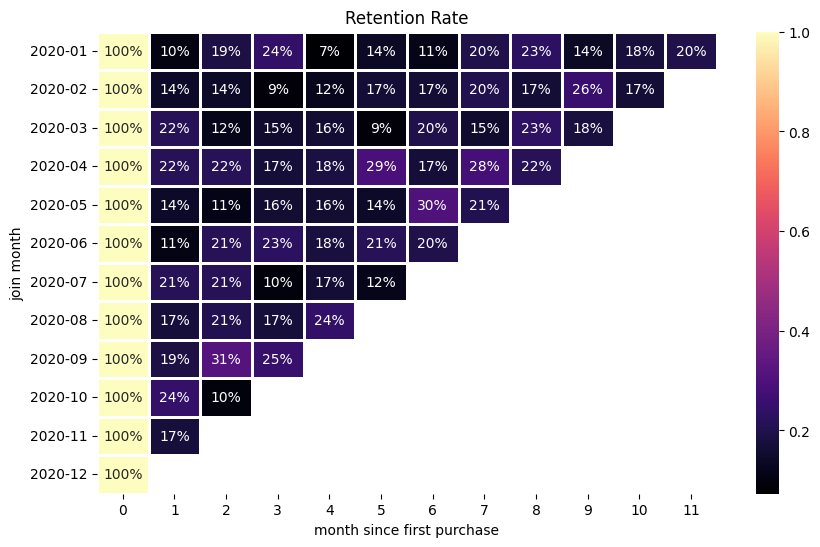

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(data=cohort_table, annot=True, linewidth=1, cmap='magma', fmt='.0%')
props = {
    'title' : 'Retention Rate',
    'xlabel': 'month since first purchase',
    'ylabel' : 'join month'
}
ax.set(**props)


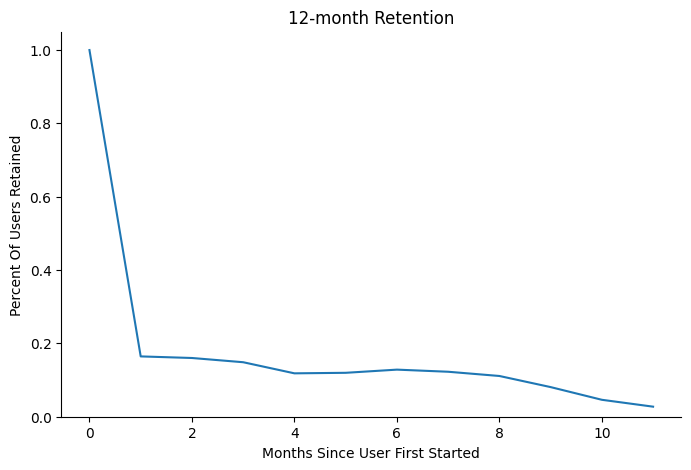

In [26]:
whole_retention = df.groupby('cohort_index')['customer_id'].nunique() / df['customer_id'].nunique()

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.lineplot(data=whole_retention)
ax.set_title("12-month Retention")
ax.set_xlabel("Months Since User First Started")
ax.set_ylabel("Percent Of Users Retained")
ax.set_ylim(0,1.05)
sns.despine()

/tmp/ipykernel_5385/3222077948.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);


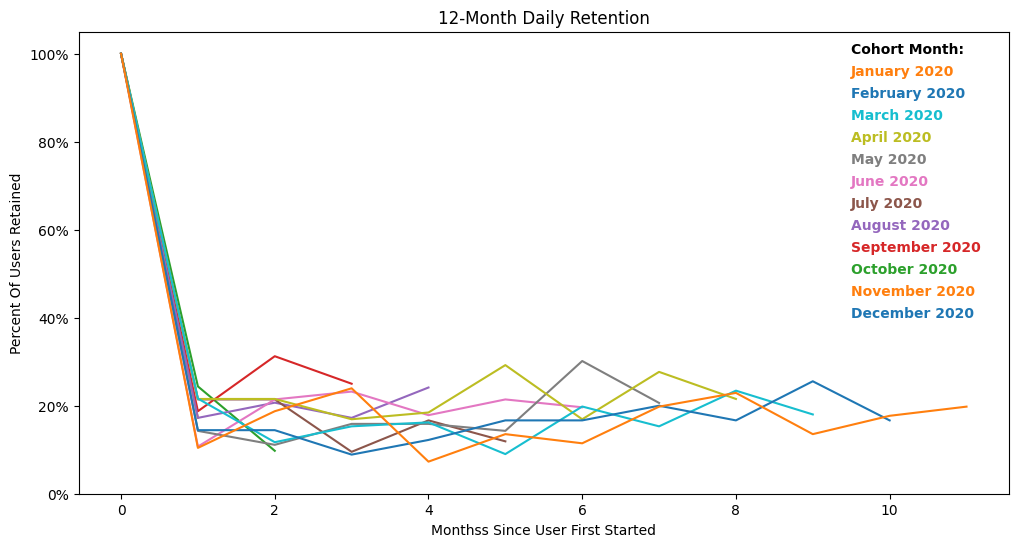

In [21]:
plt.figure(figsize=(12,6))
legend_x = 9.5
legend_y = .4

# Делаем цикл для начала каждого месяца
for i, month in enumerate(df['cohort_month'].sort_values(ascending=False).unique()):
    
    # Для каждого месяца создаем когорту, отфильтрованную по этому месяцу
    dfc = df[df['cohort_month']==pd.to_datetime(month)]

    # Затем получаем Retention для когорты, которая появилась в этом месяце
    retention_cohort = dfc.groupby('cohort_index')['customer_id'].nunique() / dfc['customer_id'].nunique()
    
    # Строим получившиеся когорты
    p = plt.plot(retention_cohort)
    
    # Легенда
    plt.text(s=pd.to_datetime(month).strftime('%B %Y'), c=p[0].get_color(),
             x=legend_x, y=legend_y + (.05 * i), weight='bold')

plt.text(s="Cohort Month:", x=legend_x, y=legend_y + (.05 * i) + .05, weight='bold')
plt.title("12-Month Daily Retention")
plt.xlabel("Monthss Since User First Started")
plt.ylabel("Percent Of Users Retained")
plt.ylim(0,1.05)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);